In [1]:
import pandas as pd
import geopandas as gpd

df = pd.read_excel('ridership.xlsx')

df2=df.groupby(['Stop ID'])['Total Activity'].sum().reset_index()

df2['Stop ID']=df2['Stop ID'].astype(int)

#number of routes 
rt_num=df.groupby(['Stop ID'])['Route'].nunique().reset_index()

In [2]:
#merge with bus freq
ridership = pd.read_csv('C:/Users/anranzheng/Dropbox (UFL)/Gap analysis/result/schedule/rt frequency.csv')

ridership2=ridership[['rt','number of bus','trips per bus','total trips']]

new_df=pd.merge(df, ridership2, how='left', left_on='Route',right_on='rt')

#number of buses passing by the stops
new_df2=new_df.groupby(['Stop ID','Route'])['total trips'].mean().reset_index()
trip_num=new_df2.groupby(['Stop ID'])['total trips'].sum().reset_index()

In [3]:
df_merge=pd.merge(rt_num, trip_num, how='left', on='Stop ID')
df2=pd.merge(df_merge, df2, how='left', on='Stop ID')

stop= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Gap analysis/data/rt GTFS data/stops.shp')

stop.stop_id=stop.stop_id.astype(int)

In [4]:
#left join
stop_group = pd.merge(stop, df2, how='left', left_on='stop_id',right_on='Stop ID')

In [5]:
df3 = pd.read_excel('Fall 2019 Ridership Info Document.xlsx')[['stop_id','W-C TOTAL','BIKE TOTAL ']]
df3

,stop_id,W-C TOTAL,BIKE TOTAL
0,1,4325,1681
1,2,82,8
2,3,27,18
3,4,119,25
4,6,19,5
...,...,...,...
1158,1573,0,0
1159,1577,0,0
1160,1578,0,5
1161,1579,0,0


In [6]:
#left join
stop_group2 = pd.merge(stop_group, df3, how='left', on='stop_id')

In [7]:
stop_group2 

,Id,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,loc_type,parent_sta,timezone,wheelchair,geometry,Stop ID,Route,total trips,Total Activity,W-C TOTAL,BIKE TOTAL
0,0,1493,1493,Butler Plaza Transfer Station,Westbound SW 30th Place @ Farside SW 42nd Street,29.625154,-82.387890,None,0,None,None,None,POINT (-82.38789 29.62515),1493.0,7.0,955.0,1829.0,1942.0,401.0
1,0,1349,1349,Hilton Garden Inn,Eastbound SW 33rd PL @ Farside SW 42nd ST,29.623016,-82.385719,None,0,None,None,None,POINT (-82.38572 29.62302),1349.0,4.0,615.0,44.0,47.0,11.0
2,0,1548,1548,Sam's Club,Eastbound SW 33rd PL @ Nearside SW 37th Blvd,29.622999,-82.383453,None,0,None,None,None,POINT (-82.38345 29.62300),1548.0,4.0,615.0,10.0,14.0,2.0
3,0,1491,1491,Lowe's @ Butler Plaza Eastbound,Eastbound Windmeadows Blvd @ Farside SW 62nd Blvd,29.623953,-82.380799,None,0,None,None,None,POINT (-82.38080 29.62395),1491.0,2.0,169.0,26.0,48.0,30.0
4,0,1306,1306,Publix at Butler Plaza,Southbound SW 35th Blvd @ Farside Windmeadows ...,29.625277,-82.378800,None,0,None,None,None,POINT (-82.37880 29.62528),1306.0,1.0,150.0,68.0,55.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,1601,1601,Markets West (Eastbound),Eastbound SW 17th RD Farside SW 74th Drive,29.637950,-82.420826,None,0,None,None,None,POINT (-82.42083 29.63795),1601.0,1.0,12.0,0.0,NaN,NaN
1077,0,1600,1600,Markets West,Westbound SW 17th Rd Nearside SW 74th Drive,29.638111,-82.421119,None,0,None,None,None,POINT (-82.42112 29.63811),1600.0,1.0,12.0,1.0,NaN,NaN
1078,0,1602,1602,Abiding Savior Church,Northbound NW 98th St Farside Newberry RD,29.661686,-82.446496,None,0,None,None,None,POINT (-82.44650 29.66169),1602.0,1.0,12.0,0.0,NaN,NaN
1079,0,1604,1604,Ellis Park,Northbound NW 98th St Nearside NW 21st Avenue,29.672492,-82.446376,None,0,None,None,None,POINT (-82.44638 29.67249),1604.0,1.0,12.0,0.0,NaN,NaN


In [7]:
stop_group2.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/gnv/Bus Stops/new stops.shp') 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_31340\2132266910.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stop_group2.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/gnv/Bus Stops/new stops.shp')


In [8]:
stop_group2[stop_group2['W-C TOTAL'].isna()].to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/gnv/Bus Stops/NA stops.shp') 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_31340\3461629051.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stop_group2[stop_group2['W-C TOTAL'].isna()].to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/gnv/Bus Stops/NA stops.shp')


## Assign transit ridership and supply to bus bundle

### noisy points

In [8]:
stop_group2=stop_group2.reset_index()

#add new columns to stop_group2: add 1 from 0
noise= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/noise100.shp')

In [12]:
stop_group2

,index,Id,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,loc_type,parent_sta,timezone,wheelchair,geometry,Stop ID,Route,total trips,Total Activity,W-C TOTAL,BIKE TOTAL
0,0,0,1493,1493,Butler Plaza Transfer Station,Westbound SW 30th Place @ Farside SW 42nd Street,29.625154,-82.387890,None,0,None,None,None,POINT (-82.38789 29.62515),1493.0,7.0,955.0,1829.0,1942.0,401.0
1,1,0,1349,1349,Hilton Garden Inn,Eastbound SW 33rd PL @ Farside SW 42nd ST,29.623016,-82.385719,None,0,None,None,None,POINT (-82.38572 29.62302),1349.0,4.0,615.0,44.0,47.0,11.0
2,2,0,1548,1548,Sam's Club,Eastbound SW 33rd PL @ Nearside SW 37th Blvd,29.622999,-82.383453,None,0,None,None,None,POINT (-82.38345 29.62300),1548.0,4.0,615.0,10.0,14.0,2.0
3,3,0,1491,1491,Lowe's @ Butler Plaza Eastbound,Eastbound Windmeadows Blvd @ Farside SW 62nd Blvd,29.623953,-82.380799,None,0,None,None,None,POINT (-82.38080 29.62395),1491.0,2.0,169.0,26.0,48.0,30.0
4,4,0,1306,1306,Publix at Butler Plaza,Southbound SW 35th Blvd @ Farside Windmeadows ...,29.625277,-82.378800,None,0,None,None,None,POINT (-82.37880 29.62528),1306.0,1.0,150.0,68.0,55.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1076,0,1601,1601,Markets West (Eastbound),Eastbound SW 17th RD Farside SW 74th Drive,29.637950,-82.420826,None,0,None,None,None,POINT (-82.42083 29.63795),1601.0,1.0,12.0,0.0,NaN,NaN
1077,1077,0,1600,1600,Markets West,Westbound SW 17th Rd Nearside SW 74th Drive,29.638111,-82.421119,None,0,None,None,None,POINT (-82.42112 29.63811),1600.0,1.0,12.0,1.0,NaN,NaN
1078,1078,0,1602,1602,Abiding Savior Church,Northbound NW 98th St Farside Newberry RD,29.661686,-82.446496,None,0,None,None,None,POINT (-82.44650 29.66169),1602.0,1.0,12.0,0.0,NaN,NaN
1079,1079,0,1604,1604,Ellis Park,Northbound NW 98th St Nearside NW 21st Avenue,29.672492,-82.446376,None,0,None,None,None,POINT (-82.44638 29.67249),1604.0,1.0,12.0,0.0,NaN,NaN


In [9]:
noise

,SOURCE_ID,CLUSTER_ID,COLOR_ID,BUFF_DIST,ORIG_FID,geometry
0,4,-1,-1,1.6,1,"POLYGON ((-82.37880 29.63971, -82.37763 29.639..."
1,13,-1,-1,1.6,2,"POLYGON ((-82.34559 29.65267, -82.34442 29.652..."
2,14,-1,-1,1.6,3,"POLYGON ((-82.34274 29.65368, -82.34157 29.653..."
3,26,-1,-1,1.6,4,"POLYGON ((-82.32270 29.66000, -82.32153 29.659..."
4,37,-1,-1,1.6,5,"POLYGON ((-82.33943 29.65833, -82.33826 29.658..."
...,...,...,...,...,...,...
219,1058,-1,-1,1.6,220,"POLYGON ((-82.36155 29.65501, -82.36038 29.654..."
220,1063,-1,-1,1.6,221,"POLYGON ((-82.43880 29.62163, -82.43763 29.621..."
221,1066,-1,-1,1.6,222,"POLYGON ((-82.40534 29.65450, -82.40417 29.654..."
222,1068,-1,-1,1.6,223,"POLYGON ((-82.43640 29.64282, -82.43523 29.642..."


In [10]:
stop_group3=stop_group2[['index','stop_id','Route','total trips','Total Activity','W-C TOTAL','BIKE TOTAL ']]

In [11]:
stop_group3

,index,stop_id,Route,total trips,Total Activity,W-C TOTAL,BIKE TOTAL
0,0,1493,7.0,955.0,1829.0,1942.0,401.0
1,1,1349,4.0,615.0,44.0,47.0,11.0
2,2,1548,4.0,615.0,10.0,14.0,2.0
3,3,1491,2.0,169.0,26.0,48.0,30.0
4,4,1306,1.0,150.0,68.0,55.0,33.0
...,...,...,...,...,...,...,...
1076,1076,1601,1.0,12.0,0.0,NaN,NaN
1077,1077,1600,1.0,12.0,1.0,NaN,NaN
1078,1078,1602,1.0,12.0,0.0,NaN,NaN
1079,1079,1604,1.0,12.0,0.0,NaN,NaN


In [38]:
#Merge noise 100 with new stop: left-source ID, right-index
#left join
noise_info = pd.merge(noise,stop_group3,how='left',left_on='SOURCE_ID', right_on='index')

,SOURCE_ID,CLUSTER_ID,COLOR_ID,BUFF_DIST,ORIG_FID,geometry,index,stop_id,Route,total trips,Total Activity,W-C TOTAL,BIKE TOTAL
0,4,-1,-1,1.6,1,"POLYGON ((-82.37880 29.63971, -82.37763 29.639...",4,1306,1.0,150.0,68.0,55.0,33.0
1,13,-1,-1,1.6,2,"POLYGON ((-82.34559 29.65267, -82.34442 29.652...",13,1199,9.0,1074.0,312.0,0.0,0.0
2,14,-1,-1,1.6,3,"POLYGON ((-82.34274 29.65368, -82.34157 29.653...",14,118,8.0,869.0,307.0,NaN,NaN
3,26,-1,-1,1.6,4,"POLYGON ((-82.32270 29.66000, -82.32153 29.659...",26,1,14.0,720.0,3265.0,4325.0,1681.0
4,37,-1,-1,1.6,5,"POLYGON ((-82.33943 29.65833, -82.33826 29.658...",37,444,3.0,272.0,33.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1058,-1,-1,1.6,220,"POLYGON ((-82.36155 29.65501, -82.36038 29.654...",1058,1582,1.0,44.0,15.0,NaN,NaN
220,1063,-1,-1,1.6,221,"POLYGON ((-82.43880 29.62163, -82.43763 29.621...",1063,1563,1.0,68.0,6.0,0.0,0.0
221,1066,-1,-1,1.6,222,"POLYGON ((-82.40534 29.65450, -82.40417 29.654...",1066,1396,2.0,30.0,3.0,6.0,2.0
222,1068,-1,-1,1.6,223,"POLYGON ((-82.43640 29.64282, -82.43523 29.642...",1068,1402,1.0,18.0,25.0,2.0,8.0


In [40]:
noise_info.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/ridership/noise_info.shp') 

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_26552\2029854812.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  noise_info.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/ridership/noise_info.shp')


### Grouped points

In [13]:
#use stops after imputation for the missing values
stop_group2= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/stops_imputation.shp')
stop_group2=stop_group2.reset_index()
stop_group3=stop_group2[['index','stop_id','Route','total_trip','Total_Acti','W_C_TOTAL','BIKE_TOTAL']]

In [14]:
stop_group3

,index,stop_id,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL
0,0,1493,7.0,955.0,1829.0,1942.0,401.0
1,1,1349,4.0,615.0,44.0,47.0,11.0
2,2,1548,4.0,615.0,10.0,14.0,2.0
3,3,1491,2.0,169.0,26.0,48.0,30.0
4,4,1306,1.0,150.0,68.0,55.0,33.0
...,...,...,...,...,...,...,...
1076,1076,1601,1.0,12.0,0.0,0.0,0.0
1077,1077,1600,1.0,12.0,1.0,0.0,0.0
1078,1078,1602,1.0,12.0,0.0,0.0,0.0
1079,1079,1604,1.0,12.0,0.0,0.0,0.0


In [73]:
group= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/dbscan100_grouped.shp')

#Merge new stop with : left-source ID, right-index
#left join
group_info = pd.merge(stop_group3,group,how='left',left_on='index', right_on='SOURCE_ID')
#remove NA as they are noisy points
new_group=group_info[group_info['geometry'].notna()]

new_group_info=new_group.groupby(['CLUSTER_ID'])['Route','total_trip','Total_Acti','W_C_TOTAL','BIKE_TOTAL'].sum().reset_index()

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_26552\3174556282.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_group_info=new_group.groupby(['CLUSTER_ID'])['Route','total_trip','Total_Acti','W_C_TOTAL','BIKE_TOTAL'].sum().reset_index()


In [15]:
buffer100= gpd.read_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/dbscan100buffer.shp')

In [16]:
buffer100

,CLUSTER_ID,BUFF_DIST,ORIG_FID,geometry
0,1,1.6,1,"POLYGON ((-82.38642 29.61052, -82.38759 29.610..."
1,2,1.6,2,"POLYGON ((-82.38514 29.60859, -82.38630 29.608..."
2,3,1.6,3,"POLYGON ((-82.38287 29.60857, -82.38404 29.608..."
3,4,1.6,4,"POLYGON ((-82.38073 29.60944, -82.38189 29.609..."
4,5,1.6,5,"POLYGON ((-82.37550 29.60936, -82.37667 29.609..."
...,...,...,...,...
399,400,1.6,400,"POLYGON ((-82.42305 29.61599, -82.42421 29.615..."
400,401,1.6,401,"POLYGON ((-82.44091 29.65987, -82.44207 29.659..."
401,402,1.6,402,"POLYGON ((-82.44579 29.65807, -82.44696 29.658..."
402,403,1.6,403,"POLYGON ((-82.44591 29.64726, -82.44708 29.647..."


In [75]:
#Merge buffer with the groupby info: left-source ID, right-index
#left join
final_group_info = pd.merge(buffer100,new_group_info,how='left',on='CLUSTER_ID')
final_group_info

,CLUSTER_ID,BUFF_DIST,ORIG_FID,geometry,Route,total_trip,Total_Acti,W_C_TOTAL,BIKE_TOTAL
0,1,1.6,1,"POLYGON ((-82.38642 29.61052, -82.38759 29.610...",8.0,1235.0,1829.0,1942.0,401.0
1,2,1.6,2,"POLYGON ((-82.38514 29.60859, -82.38630 29.608...",8.0,1230.0,124.0,89.0,25.0
2,3,1.6,3,"POLYGON ((-82.38287 29.60857, -82.38404 29.608...",8.0,1230.0,42.0,45.0,18.0
3,4,1.6,4,"POLYGON ((-82.38073 29.60944, -82.38189 29.609...",4.0,338.0,51.0,135.0,46.0
4,5,1.6,5,"POLYGON ((-82.37550 29.60936, -82.37667 29.609...",2.0,300.0,77.0,66.0,70.0
...,...,...,...,...,...,...,...,...,...
399,400,1.6,400,"POLYGON ((-82.42305 29.61599, -82.42421 29.615...",2.0,36.0,4.0,0.0,2.0
400,401,1.6,401,"POLYGON ((-82.44091 29.65987, -82.44207 29.659...",2.0,24.0,2.0,0.0,0.0
401,402,1.6,402,"POLYGON ((-82.44579 29.65807, -82.44696 29.658...",2.0,24.0,0.0,0.0,0.0
402,403,1.6,403,"POLYGON ((-82.44591 29.64726, -82.44708 29.647...",2.0,24.0,0.0,0.0,0.0


In [76]:
final_group_info.to_file('C:/Users/anranzheng/Dropbox (UFL)/Mobility Hub/Data/process data/ridership/group_info.shp') 

In [ ]:
#add new info: number of bus routes going through each bus bundle?

Text(0.5, 1.0, 'Number of bus routes at each bus stop')

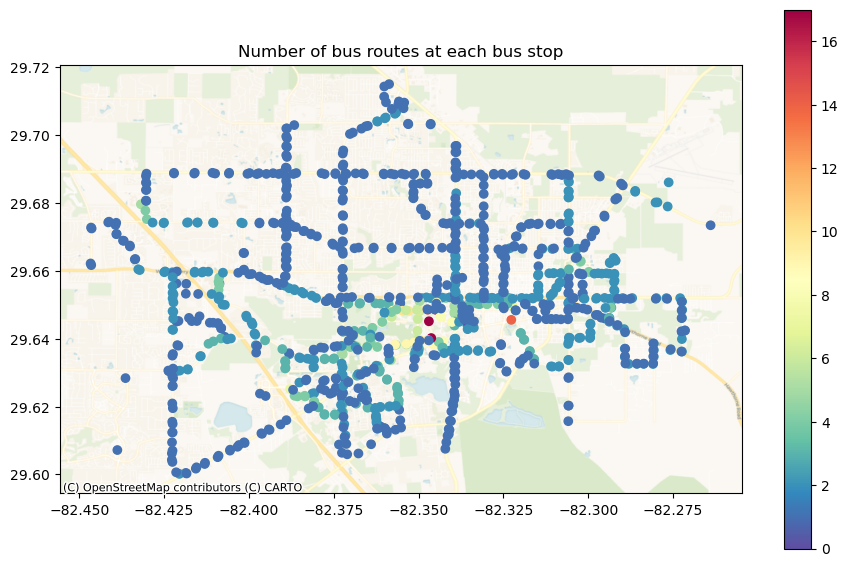

In [111]:
import contextily as ct

fig, ax = plt.subplots(1, 1, figsize = (11,7))
stop_group2.plot(ax=ax,column='Route', cmap='Spectral_r',legend=True)
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Number of bus routes at each bus stop')

In [112]:
stop_group2.columns

Index(['index', 'Id', 'stop_id', 'stop_code', 'stop_name', 'stop_desc',
       'stop_lat', 'stop_lon', 'stop_url', 'loc_type', 'parent_sta',
       'timezone', 'wheelchair', 'Stop_ID_1', 'Route', 'total_trip',
       'Total_Acti', 'W_C_TOTAL', 'BIKE_TOTAL', 'geometry'],
      dtype='object')

Text(0.5, 1.0, 'Number of bus passing by each bus stop')

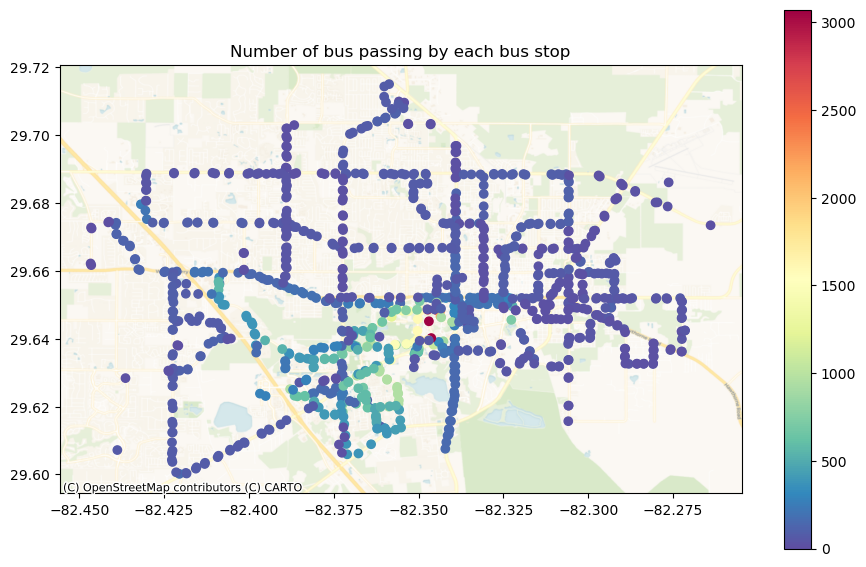

In [113]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
stop_group2.plot(ax=ax,column='total_trip', cmap='Spectral_r',legend=True)
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Number of bus passing by each bus stop')

Text(0.5, 1.0, 'Passenger ridership by each bus stop')

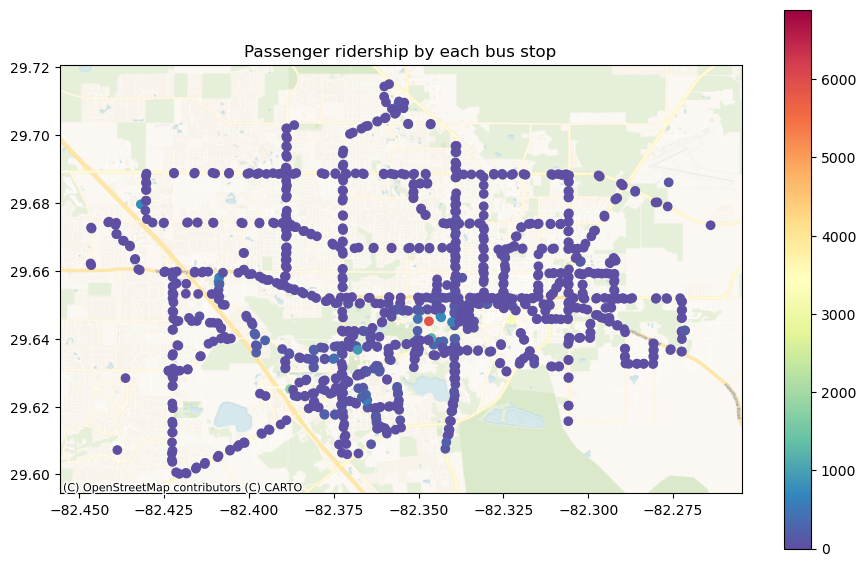

In [114]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
stop_group2.plot(ax=ax,column='Total_Acti', cmap='Spectral_r',legend=True)
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Passenger ridership by each bus stop')

Text(0.5, 1.0, 'Wheelchair boarding by each bus stop')

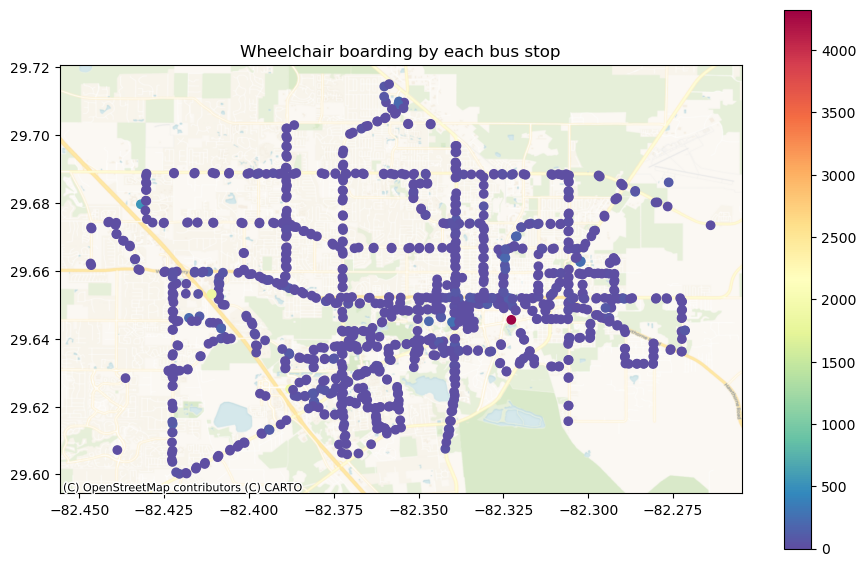

In [115]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
stop_group2.plot(ax=ax,column='W_C_TOTAL', cmap='Spectral_r',legend=True)
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Wheelchair boarding by each bus stop')

Text(0.5, 1.0, 'Bicycle boarding by each bus stop')

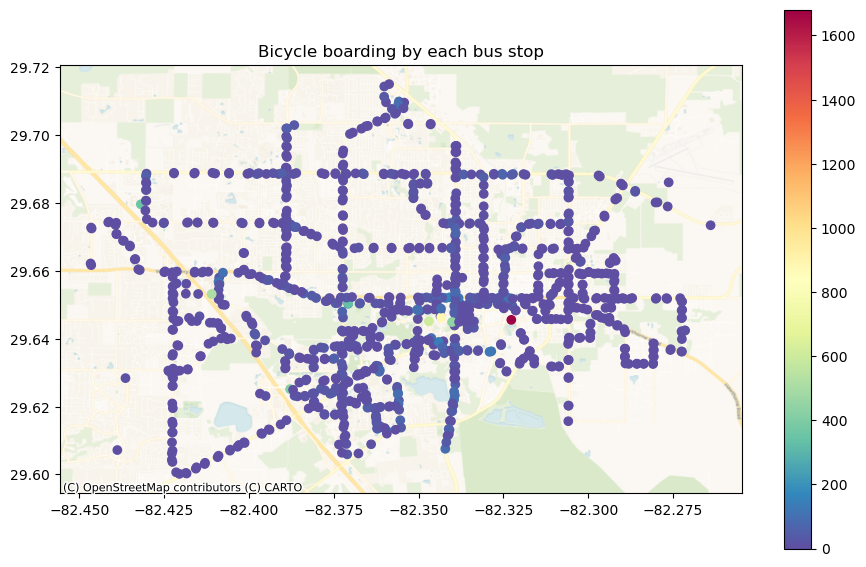

In [116]:
fig, ax = plt.subplots(1, 1, figsize = (11,7))
stop_group2.plot(ax=ax,column='BIKE_TOTAL', cmap='Spectral_r',legend=True)
ct.add_basemap(ax, crs = 'EPSG:4326', source= ct.providers.CartoDB.Voyager)
plt.title('Bicycle boarding by each bus stop')